## Find candidate state base on magnitude of change in Price Per Square Foot (PPSF)

#### By Gen Ho, Cliff Gong, Xinqian Zhai

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime 
from datetime import timedelta

In [2]:
df_ppsf = pd.read_csv('./data/redfin_homeprice_sales_inventory.csv')

In [3]:
df_ppsf.shape

(2068, 65)

In [4]:
df_ppsf.head()

,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,City,last_updated,Measure Display,parent_metro_region,...,pending_sales_yoy,Period Duration,Price Drops,Price Drops Mom,Price Drops Yoy,property_type_id,region_type_id,Sold Above List,Sold Above List Mom,Sold Above List Yoy
0,Idaho,Dec-19,All Residential,State,False,ID,NaN,9/12/21 15:00,NaN,West Region,...,3.80%,30,0.121472,-0.036469,0.001859,-1,4,0.207317,-0.001611,0.003635
1,Alabama,Sep-19,All Residential,State,False,AL,NaN,9/12/21 15:00,NaN,South Region,...,21.40%,30,0.177454,-0.006148,0.063457,-1,4,0.199459,-0.002732,-0.054077
2,Arkansas,Feb-18,All Residential,State,False,AR,NaN,9/12/21 15:00,NaN,South Region,...,5.50%,30,0.119915,-0.012276,-0.002200,-1,4,0.104323,0.003500,-0.002209
3,Connecticut,Aug-21,All Residential,State,False,CT,NaN,9/12/21 15:00,NaN,Northeast Region,...,5.70%,30,0.191397,0.015491,0.043831,-1,4,0.568150,-0.036566,0.204706
4,Iowa,Jun-18,All Residential,State,False,IA,NaN,9/12/21 15:00,NaN,Midwest Region,...,-5.10%,30,0.198905,0.020941,0.193224,-1,4,0.268657,0.004845,-0.014331


In [5]:
# only pick the columns we need
df_ppsf = df_ppsf[['Region', 'Period Begin', 'Median Ppsf']]
df_ppsf.columns = ['state', 'date', 'ppsf']
df_ppsf['date'] = pd.to_datetime(df_ppsf['date'])
# the time range for this study is from Jan-01-2018 to Jun-06-30
df_ppsf = df_ppsf[(df_ppsf['date'] >= '2018-01-01') & (df_ppsf['date'] <= '2021-06-30')]
# we only need the begin date and end date of required time period 
df_ppsf = df_ppsf.groupby(by='state').apply(lambda x: x[(x['date']==x['date'].max()) | (x['date']==x['date'].min())]).reset_index(drop=True)
df_ppsf = df_ppsf.pivot(index='state', columns='date', values='ppsf').reset_index()
df_ppsf.columns = ['state', 'begin_period', 'end_period']
df_ppsf['ppsf_change'] = df_ppsf['end_period'] - df_ppsf['begin_period']

Create a bar plot for PPSF change across states

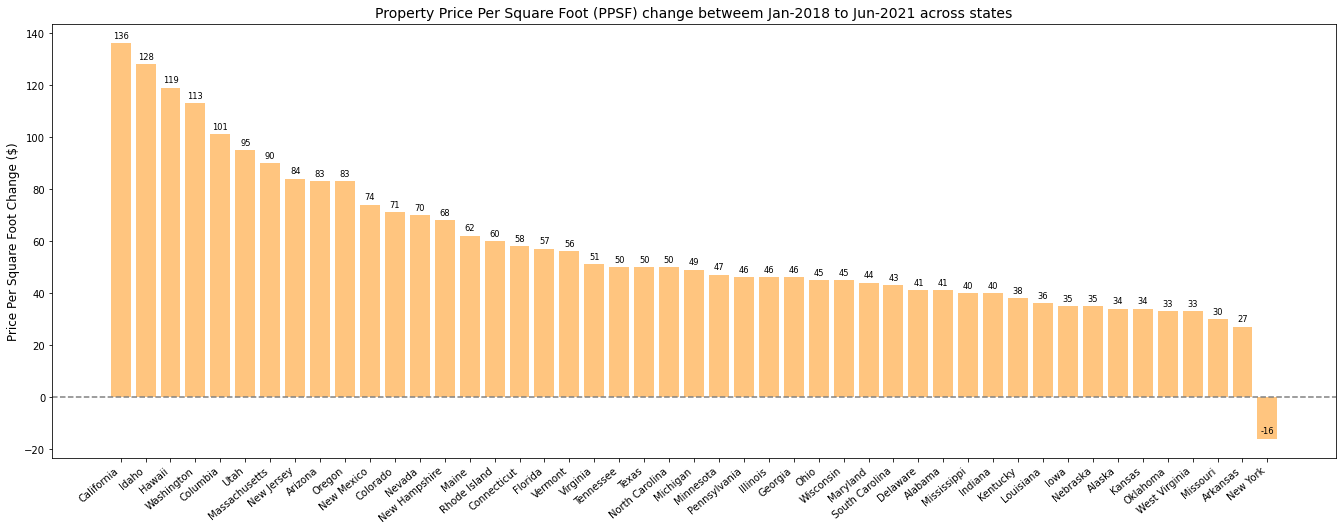

In [6]:
#helper function for annotation 
def value_label(plt, rects):
    #Attach a text label above each bar in *rects*, displaying its height.
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{:1.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize='small')

# sort the dataframe by ppsf_change decending order 
df_ppsf = df_ppsf.sort_values(by='ppsf_change', ascending=False)

bar_width = 0.8
opacity = 0.5
bar_color = 'darkorange'

plt.figure()

x_labels = df_ppsf['state'].values 
x = np.arange(len(x_labels))
y = df_ppsf['ppsf_change'].values 

rects = plt.bar(x, y, bar_width, alpha=opacity, color=bar_color)
plt.xticks(ticks=x, labels=x_labels, rotation=40, fontsize=10, ha='right')
value_label(plt, rects)
plt.ylabel('Price Per Square Foot Change ($)', fontsize='large')
plt.axhline(0, c='grey', ls="--")
plt.gcf().set_size_inches(23,8)
plt.title("Property Price Per Square Foot (PPSF) change betweem Jan-2018 to Jun-2021 across states", y=1, fontsize='14')
plt.show()



#### Findings:
From the chart above, we picked California, Taxis, and New York states, which has the highest, midian, and lowest Property Price Per Square Foot (PPSFC) changes between Jan 2018 to 2021, as our nominated states for this project. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=718fdf0e-933b-4ec5-90a8-5b2fe887b720' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>